In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#initial data
#number of points
k1 = 11
k2 = 6
k3 = 21
#coef
a = 2.5+14./40 
#step
h1 = 1./10
h2 = 1./5
h3 = 1./20
#function
def func(x,y):
    return (-y**2+(a*x)/(1+x**2))

In [3]:
def eulerMethod(c,k,h):
    z = np.zeros(k)
    z[0] = -0.4122
    for i in range(k-1):
        z[i+1] = z[i]+h*func(c[i],z[i])
    return z

In [4]:
def RK(c):
    l = np.zeros(11)
    l[0] = -0.4122
    step = 0.1
    for i in range(10):
        q1 = step*func(c[i],l[i])
        q2 = step*func(c[i]+step/2,l[i]+q1/2)
        q3 = step*func(c[i]+step/2,l[i]+q2/2)
        q4 = step*func(c[i]+step,l[i]+q3)
        l[i+1] = l[i]+1./6*(q1+2*q2+2*q3+q4)
    return l

In [5]:
x1 = np.linspace(0,1,k1)
x2 = np.linspace(0,1,k2)
x3 = np.linspace(0,1,k3)
y1 = eulerMethod(x1,k1,h1)
y2 = eulerMethod(x2,k2,h2)
y3 = eulerMethod(x3,k3,h3)
#Runge–Kutta method
y4 = RK(x1)

In [6]:
#calculate coef for Adams method
vary = np.zeros(11)
varh1 = np.zeros(11)
varh2 = np.zeros(10)
varh3 = np.zeros(9)
varh4 = np.zeros(8)
varh5 = np.zeros(7)
vary[0:5] = y4[0:5]
for i in range(5):
    varh1[i] = 0.1*func(x1[i],vary[i])
for i in range(4):
    varh2[i] = varh1[i+1]-varh1[i]
for i in range(3):
    varh3[i] = varh2[i+1]-varh2[i]
for i in range(2):
    varh4[i] = varh3[i+1]-varh3[i]
varh5[0] = varh4[1]-varh4[0]

In [7]:
#Adams
for i in range(5,11):
    vary[i] = vary[i-1]+varh1[i-1]+1./2*varh2[i-2]+5./12*varh3[i-3]+3./8*varh4[i-4]+251./720*varh5[i-5]
    varh1[i] = 0.1*func(x1[i],vary[i])
    varh2[i-1] = varh1[i]-varh1[i-1]
    varh3[i-2] = varh2[i-1]-varh2[i-2]
    varh4[i-3] = varh3[i-2]-varh3[i-3]
    varh5[i-4] = varh4[i-3]-varh3[i-4]

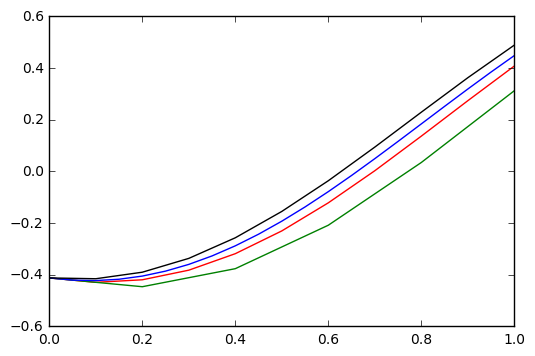

In [8]:
plt.plot(x1,y1,color = "red") #k=11
plt.plot(x2,y2,color = "green") #k=6
plt.plot(x3,y3,color = "blue") #k=21
plt.plot(x1,vary,color = "black") #Adams k=11
plt.show()

In [9]:
#calculate error for k=11 and k=21
M1 = 0.484203
M2 = 2.85
M3 = 0.968406
M4 = M2+M1*M3
A1 = M4/(2*M3)*h1*np.e**(M3*(x1[10]-x1[0]))
A2 = M4/(2*M3)*h3*np.e**(M3*(x3[20]-x3[0]))

In [18]:
#error for different k
print "А={} при k=11,   А={} при k=21\n".format(A1,A2)
error1 = abs(vary[10]-y1[10])
error2 = abs(vary[10]-y3[20])
#subtraction
print "Разность при k=11 :  {}\n".format(error1)
print "Разность при k=21 :  {}\n".format(error2)
#Summary table
print "k     y1               y3                   Adams              RK"
for i in range(7):
    print "{k}   {y1:.10f}     {y3:.10f}     {Adams:.10f}      {RK:.10f}".format(k=i,y1=y1[i],y3=y3[i*2],Adams=vary[i],RK=y4[i])
for i in range(7,10):
    print "{k}    {y1:.10f}      {y3:.10f}      {Adams:.10f}       {RK:.10f}".format(k=i,y1=y1[i],y3=y3[i*2],Adams=vary[i],RK=y4[i])
i += 1
print "{k}   {y1:.10f}      {y3:.10f}      {Adams:.10f}       {RK:.10f}".format(k=i,y1=y1[i],y3=y3[i*2],Adams=vary[i],RK=y4[i])

А=0.451316018383 при k=11,   А=0.225658009191 при k=21

Разность при k=11 :  0.0809689355561

Разность при k=21 :  0.0404821935711


k     y1               y3                   Adams              RK
0   -0.4122000000     -0.4122000000     -0.4122000000      -0.4122000000
1   -0.4291908840     -0.4224374428     -0.4153357038      -0.4153357038
2   -0.4193935437     -0.4050514844     -0.3900404729      -0.3900404729
3   -0.3821749459     -0.3597656104     -0.3365162534      -0.3365162534
4   -0.3183403478     -0.2879319260     -0.2567976069      -0.2567976069
5   -0.2301985434     -0.1925638049     -0.1547859200      -0.1547065013
6   -0.1214976804     -0.0781892844     -0.0359896351      -0.0355669596
7    0.0027614451      0.0494747093      0.0942551736       0.0942994265
8    0.1366533000      0.1840223621      0.2293321769       0.2282369252
9    0.2738102778      0.3189894459      0.3627512845       0.3599658572
10   0.4080257782      0.4485125201      0.4889947137       0.484196798